# **<font color=blue>W4 Quiz</font>**
### 在本章三個小節各選一個較複雜的範例，分別予以修改並執行。繳交截圖與說明修改的部分與效果
### 有詢問過教授，教授表示也可以自行對於３個小節中不同套件自己發揮。
> 因為之前有學過這些套件的使用方法，所以這次功課除了第一題(照片讀取)以外都是自己之前利用套件打的code，並進行修改來當做這次功課

### 有把圖片和titanic的csv檔案放在zip裡面，如果助教有需要檢查，需要把code中讀取檔案的位置做更改
### 最後面有多一個code是使用三個所教的套件搭配機器學習KNN演算法分析titanic dataset

# **<font color=brown>1.numpy</font>**
## 使用numpy與opencv來對照片調整亮度
### 使用自己拍的照片當作調整照片，因為原本照片太暗了剛好可以藉由這次功課來練習
### opencv 
- 使用opencv來讀取照片與顯示照片

### numpy
- 因為圖片類型矩陣都是unit8型態，所以使用np.unit8
- 再利用np.clip對照片進行亮度調整

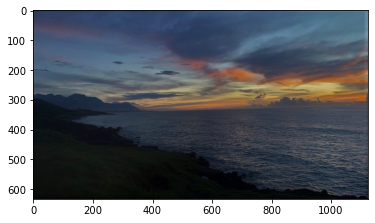

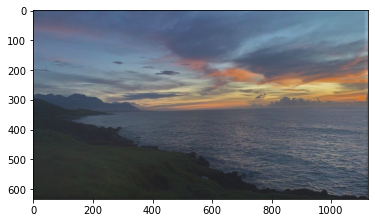

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_img_jupyter(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (600, 600))
    plt.imshow(image_rgb)
    cv2.waitKey()
    cv2.destroyAllWindows()
    plt.show()


img = cv2.imread("D:/pic.jpg")

show_img_jupyter(img)
res = np.uint8(np.clip((img + 30), 0, 255))
show_img_jupyter(res)

# **<font color=brown>2.pandas</font>**
## 這邊是我利用爬蟲去取得imdb網站上針對不同類型電影，爬下該類型評分由高到低的10個電影<br>並利用pandas把爬下來的資訊處理並顯示
### 需要使用requests與BeautifulSoup套件來爬蟲
### pandas
- 爬下資訊後先存入二維陣列中
- 使用二維陣列並放入pandas的dataframe中來顯示

### 使用方法
- 先輸入想查詢電影類型的代號
- 輸入完成後便會顯示該類型由高到低的前10個電影


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


genre = ["Action","Adventure","Animation","Biography","Comedy","Crime","Drama","Family","Fantasy","History","Horror","Music","Musical","Mystery","Romance","Sci-Fi","Sport","Thriller","War","Western"]
genre2 = ["1:Action","2:Adventure","3:Animation","4:Biography","5:Comedy","6:Crime","7:Drama","8:Family","9:Fantasy","10:History","11:Horror","12:Music","13:Musical","14:Mystery","15:Romance","16:Sci-Fi","17:Sport","18:Thriller","19:War","20:Western"]
print("類型選擇:")
for i in range(len(genre2)):
    print(genre2[i])
print()
name = input("請輸入查詢類型號碼: ")


print()
url = ""
count = 0
for i in range(len(genre)):
    if str(name) == str(i+1):
        url = "https://www.imdb.com/search/title?genres=" + genre[count].lower() + "&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=5aab685f-35eb-40f3-95f7-c53f09d542c3&pf_rd_r=9RH8JQQN18JZV9QMNKGS&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_" + str(count+1)
        break
    count += 1

idx = ["名稱","分級","長度","評價","連結"]
cl = [1,2,3,4,5,6,7,8,9,10]
arr = []


html = requests.get(url)
html.encoding = 'utf8'
sp = BeautifulSoup(html.text, 'lxml')

data = sp.find_all("h3",class_ = "lister-item-header")
count = 0
pdcount = int(0)
arr.append([])
for i in data:
    temp = i.text.replace("\n","")
    arr[pdcount].append(temp)
    count += 1
    if count == 10:
        break

pdcount += 1
arr.append([])        
data2 = sp.find_all("span",class_ = "certificate")
count = 0
for i in data2:
    arr[pdcount].append(i.text.replace("\n",""))
    count += 1
    if count == 10:
        break

pdcount += 1
arr.append([])
data3 = sp.find_all("span",class_ = "runtime")
count = 0
for i in data3:
    arr[pdcount].append(i.text.replace("\n",""))
    count += 1
    if count == 10:
        break

pdcount += 1 
arr.append([])
data4 = sp.find_all("div",class_ = "inline-block ratings-imdb-rating")
count = 0
for i in data4:
    arr[pdcount].append(i.text.replace("\n",""))
    count += 1
    if count == 10:
        break

arr.append([])
pdcount += 1 
data7 =  sp.select('h3.lister-item-header a')
count = 0 
begin = "https://www.imdb.com" 
end = "?ref_=adv_li_tt" 
for i in data7:     
    arr[pdcount].append(begin + i["href"] + end)     
    count += 1     
    if count == 10:         
        break
arr2 = pd.DataFrame(arr, columns = cl, index = idx)
arr2


類型選擇:
1:Action
2:Adventure
3:Animation
4:Biography
5:Comedy
6:Crime
7:Drama
8:Family
9:Fantasy
10:History
11:Horror
12:Music
13:Musical
14:Mystery
15:Romance
16:Sci-Fi
17:Sport
18:Thriller
19:War
20:Western

請輸入查詢類型號碼: 16



,1,2,3,4,5,6,7,8,9,10
名稱,1.全面啟動(2010),2.駭客任務(1999),3.星際大戰五部曲：帝國大反擊(1980),4.星際效應(2014),5.星際大戰(1977),6.頂尖對決(2006),7.魔鬼終結者2(1991),8.回到未來(1985),9.蜘蛛人：新宇宙(2018),10.復仇者聯盟：終局之戰(2019)
分級,PG-12,PG-12,PG,PG-13,PG,PG-13,R-12,GP,PG-12,PG-12
長度,148 min,136 min,124 min,169 min,121 min,130 min,137 min,116 min,117 min,181 min
評價,8.8,8.7,8.7,8.6,8.6,8.5,8.5,8.5,8.4,8.4
連結,https://www.imdb.com/title/tt1375666/?ref_=adv...,https://www.imdb.com/title/tt0133093/?ref_=adv...,https://www.imdb.com/title/tt0080684/?ref_=adv...,https://www.imdb.com/title/tt0816692/?ref_=adv...,https://www.imdb.com/title/tt0076759/?ref_=adv...,https://www.imdb.com/title/tt0482571/?ref_=adv...,https://www.imdb.com/title/tt0103064/?ref_=adv...,https://www.imdb.com/title/tt0088763/?ref_=adv...,https://www.imdb.com/title/tt4633694/?ref_=adv...,https://www.imdb.com/title/tt4154796/?ref_=adv...


# **<font color=brown>3.matplotlib</font>**
## matplotlib套件的應用是利用pandas讀取苗栗縣戶政服務網的資料，並利用裡面的資料進行畫圖
### 分別利用其中資料畫出男女人口合計圖，遷入遷出，戶數以及出生，死亡。
### matplotlib
- 利用plt.subplot設定有幾個圖要畫還有他們的位置
- plt.plot用來畫點線圖
- plt.bar用來畫長條圖


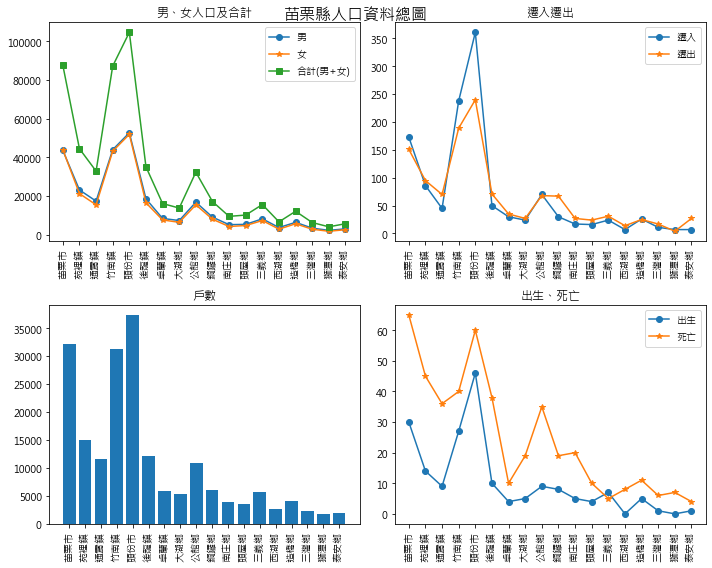

In [51]:
#3-4
import matplotlib.pyplot as plt
import pandas as pd

ar = pd.read_html("https://mlhr.miaoli.gov.tw/tables2.php?y=110&m=2&unit=")
arr = ar[0]
arr = arr.values.tolist()
plt.rcParams['font.family'] = 'Microsoft JhengHei'

x1,y1,y2,y3,y4,y5,y6,y7,y8=[],[],[],[],[],[],[],[],[]
for i in range(18):
    y1.append(arr[i][3])
    y2.append(arr[i][4])
    y3.append(arr[i][5])
    y4.append(arr[i][6])
    y5.append(arr[i][7])
    y6.append(arr[i][2])
    y7.append(arr[i][8])
    y8.append(arr[i][9])
    x1.append(arr[i][0])


plt.figure(figsize = (10, 8))


plt.subplot(221)
plt.plot(x1,y1,'o-', label = "男")
plt.plot(x1,y2,'*-', label = "女")
plt.plot(x1,y3,'s-', label = "合計(男+女)")
plt.legend(loc = (1))
plt.title("男、女人口及合計")
plt.xticks(rotation=90)

plt.subplot(222)
plt.plot(x1,y4,'o-', label = "遷入")
plt.plot(x1,y5,'*-', label = "遷出")
plt.legend(loc = (1))
plt.title("遷入遷出")
plt.xticks(rotation=90)

plt.subplot(223)
plt.bar(x1,y6)
plt.title("戶數")
plt.xticks(rotation=90)

plt.subplot(224)
plt.plot(x1,y7,'o-', label = "出生")
plt.plot(x1,y8,'*-', label = "死亡")
plt.legend(loc = (1))
plt.title("出生、死亡")
plt.xticks(rotation=90)

plt.suptitle("苗栗縣人口資料總圖",fontsize=16)
plt.tight_layout()
plt.show()



# **<font color=brown>4.綜合運用搭配機器學習</font>**
## 用titanic的dataset，配合numpy，pandas，matplotlib搭配機器學習的KNN演算法，來找出最適合的k值。

### Pclass+Sex的score最好，所以選擇用這個特徵來找出最適合k值
- 選定用Pclass+Sex之後，k值從1用迴圈跑到199。而每次用不一樣的k值時，我都使用當前的k值來進行訓練測試20次，把每次的score都加起來最後取平均
- 也把每次訓練的score利用matplotlib畫出來，可以看到k值其實介於50-150的score都還不錯

### pandas
- 使用drop()來移除不需要用到特徵
- 使用pandas的dataframe

### numpy 
- 利用np.arrange來創畫圖所需要的x軸
- 使用.reshape()來對list行列進行操作

### matplotlib
- 利用畫圖的方式，紀錄KNN在不同k值的準確率
- 紀錄準確率並畫圖來視覺化



82.23376623376625%
k=  111


<function matplotlib.pyplot.show(*args, **kw)>

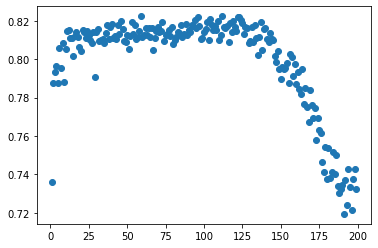

In [14]:
from sklearn import tree
from sklearn import datasets
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

labelencoder = LabelEncoder()
arr = pd.read_csv("D:/google download/titanic.csv")
arr.head()

y = arr[['Survived']].values.reshape(-1, 1)

x = arr.drop('Survived', axis = 1).drop('PassengerId', axis = 1).drop('Name', axis = 1)

cl = ["PClass","Age","Sex"]

data = pd.DataFrame(x,columns = cl)
data = data[:1282]
y = y[:1282]


data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Sex'] = labelencoder.fit_transform(data['Sex'])
data['PClass'] = labelencoder.fit_transform(data['PClass'])

sex = data[['Sex']].values.reshape(-1, 1)
age = data[['Age']].values.reshape(-1, 1)
classs = data[['PClass']].values.reshape(-1, 1)

sa = data.drop('PClass', axis = 1)
sc = data.drop('Age', axis = 1)
ac = data.drop('Sex', axis = 1)


#for c in sex:
    #print(c, end=" ")
#print(i)
s = np.arange(1, 200)
s1 = []
print('\n')
ave = 0
for j in range(1,200):
    #print("test k = ",j)
    ave = 0
    for i in range(20):
        train_data , test_data , train_label , test_label = train_test_split(sc,y.ravel(),test_size=0.3)
        knn = KNeighborsClassifier(n_neighbors= j)
        knn.fit(train_data,train_label)
        ave = ave + knn.score(test_data, test_label)
    #print(ave/20)
    s1.append(ave/20)
maxx = max(s1)
idx = s1.index(maxx)
print(max(s1)*100, end = "%\n")
print("k= ", idx)
plt.plot(s,s1,'o')
plt.show
